In [1]:
import pandas as pd
import numpy as np

In [120]:
df = pd.read_csv("train-2.csv")

In [4]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [10]:
ytrain = df.Age
xtrain = df.drop(['id','Age'], axis=1)
xtrain.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


/Users/rudrakshamakwana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

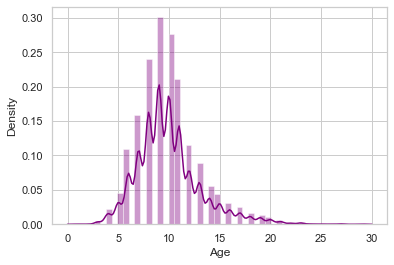

In [24]:
sns.set(style='whitegrid')
sns.distplot(df['Age'], kde=True, color='purple')

In [31]:
df.Sex.value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

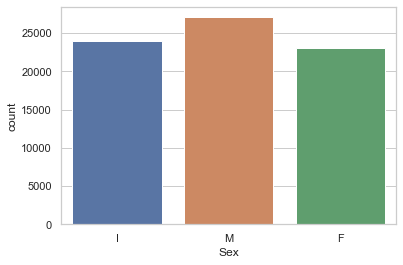

In [32]:
sns.countplot(data=df, x=df.Sex)

<AxesSubplot:xlabel='Height'>

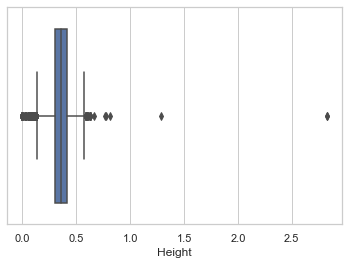

In [36]:
sns.boxplot(data=df, x=df.Height)

<AxesSubplot:>

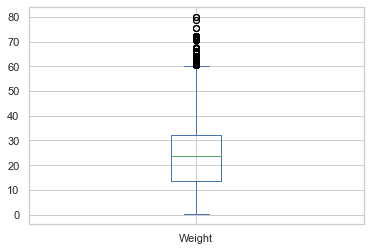

In [37]:
df.Weight.plot(kind='box')

In [39]:
pivotTab = df.pivot_table(index=df['Age'], columns=df['Sex'],values='Height', aggfunc='count')

In [40]:
pivotTab

Sex,F,I,M
Age,,,
1,NaN,16.0,NaN
2,NaN,14.0,NaN
3,NaN,205.0,8.0
4,1.0,898.0,49.0
5,15.0,1774.0,124.0
6,102.0,4149.0,281.0
7,377.0,5411.0,786.0
8,1747.0,5582.0,2637.0
9,4178.0,3026.0,5269.0


In [41]:
df.corr()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,0.000165,0.000290,0.000967,-0.000910,-0.000801,-0.000640,-0.000816,0.000089
Length,0.000165,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,0.000290,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,0.000967,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.000910,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.000801,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.000640,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.000816,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,0.000089,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

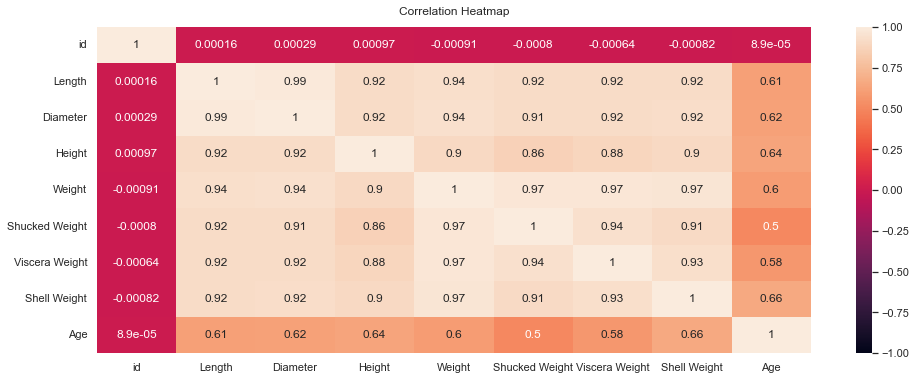

In [48]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [52]:
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [55]:
df.drop(['id','Shucked Weight','Viscera Weight','Shell Weight'], axis=1, inplace=True)

In [56]:
df

,Sex,Length,Diameter,Height,Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,9
1,I,1.1000,0.8250,0.2750,10.418441,8
2,M,1.3875,1.1125,0.3750,24.777463,9
3,F,1.7000,1.4125,0.5000,50.660556,11
4,I,1.2500,1.0125,0.3375,23.289114,8
...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,10
74047,I,1.0750,0.8625,0.2750,10.446791,6
74048,F,1.4875,1.2000,0.4125,29.483480,10
74049,I,1.2125,0.9625,0.3125,16.768729,8


In [57]:
X = df.drop('Age', axis=1)
y = df.Age

In [62]:
X.replace({'I':0,'M':1,'F':2}, inplace=True)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
sc = StandardScaler()
sc.fit(X)
X_Scaledss = pd.DataFrame(sc.transform(X), columns=X.columns)

In [87]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(-1,1))

In [90]:
X_scaled = pd.DataFrame(mm.fit_transform(X) , columns = X.columns )

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.33, random_state=42)

In [92]:
x_test.shape

(24437, 5)

In [93]:
x_train.shape

(49614, 5)

In [94]:
y_test.shape

(24437,)

In [95]:
lg = LinearRegression()
lg.fit(x_train,y_train)

LinearRegression()

In [96]:
lg.coef_

array([ 0.55500264, -2.17205706,  3.66674996, 19.20292252,  0.19843843])

In [97]:
lg.feature_names_in_

array(['Sex', 'Length', 'Diameter', 'Height', 'Weight'], dtype=object)

In [98]:
lg.intercept_

24.302693663349256

In [100]:
y_pred = lg.predict(x_test)

In [110]:
y_pred1 = pd.DataFrame(np.transpose([y_pred,y_test]), columns=['Y_pred','Y_test'])

In [113]:
y_pred1['error'] =y_pred1.Y_pred - y_pred1.Y_test

In [114]:
y_pred1

,Y_pred,Y_test,error
0,11.613122,18.0,-6.386878
1,5.746082,6.0,-0.253918
2,9.363461,8.0,1.363461
3,7.734063,8.0,-0.265937
4,7.677582,8.0,-0.322418
...,...,...,...
24432,8.178536,7.0,1.178536
24433,7.127176,7.0,0.127176
24434,10.735028,11.0,-0.264972
24435,8.451826,7.0,1.451826


In [117]:
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:",r2_score(y_test, y_pred))

MSE 5.705370585549118
RMSE: 2.388591757824915
MAE: 1.67937593418141
R2 Score: 0.4364611941226979


In [118]:
# feature enginnering 

In [123]:
df['size'] = df.Height*df.Diameter*df.Weight

In [124]:
df.sex

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,size
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,12.766311
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,2.363684
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,10.336848
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,35.779018
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,7.958327
...,...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,27.982042
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,2.477848
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,14.594323
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8,5.043719


In [125]:
df.replace({'I':0,'M':1,'F':2}, inplace=True)

In [127]:
#Now considering only few paramters to build a model
#1st one is sex of the crab 
#2nd is size of the crab which i got by multiplying crab weight, height and lenght 
#also considering 3 types of crabs 
#1st one is Male Crab 
#2nd one is Female crab 
#3nd one is infant crab

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
X2 = df.drop(['id','Length','Diameter','Height','Shucked Weight','Viscera Weight','Shell Weight','Age'], axis=1)
y2= df.Age

In [152]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(-1,1))
X2_scaled=pd.DataFrame(mm.fit_transform(X2), columns=X2.columns)

In [153]:
models=[]
models.append(('lr',LinearRegression()))
models.append(('lr',Lasso()))
models.append(('rr',Ridge()))
models.append(('enr',ElasticNet()))
models.append(('rfr',RandomForestRegressor()))
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7,shuffle=True) 
    cross_val_sc=cross_val_score(model,X2,y2,scoring='neg_mean_absolute_error',cv=kfold)
    print('{} : NMAE: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))

lr : NMAE: -1.7518069337475979(standard deviation: 0.018574438414436262)
lr : NMAE: -1.8159380288387137(standard deviation: 0.020015010939632392)
rr : NMAE: -1.7518071778335422(standard deviation: 0.01857450588300166)
enr : NMAE: -1.8137142930663224(standard deviation: 0.020071176020234102)
rfr : NMAE: -1.8467815339508769(standard deviation: 0.017901353248242578)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet